# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [6]:
import pandas as pd

df = pd.read_csv('base_final.csv')

df_dummies = pd.read_csv('base_dummies.csv')


In [ ]:
pip install scikit-learn

In [7]:
df_dummies

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,mau_True
0,0,58.832877,3.106849,1,0,0,0,2.0,True,True,...,True,False,False,False,True,False,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,True,False,True,False,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,True,False,True,False,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,True,True,...,True,False,False,False,True,False,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,True,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,False,False,...,False,False,False,False,True,False,False,False,False,True
16646,0,43.389041,7.380822,1,1,1,0,2.0,False,False,...,True,False,False,False,True,False,False,False,False,True
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,True,False,False,False,True,False,False,False,False,True
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,True,False,False,False,True,False,False,False,False,True


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [27]:
# 1) 
from sklearn.tree import DecisionTreeClassifier

# Crie uma instância do DecisionTreeClassifier com os hiperparâmetros desejados
modelo = DecisionTreeClassifier(criterion='gini', max_depth=None)


In [29]:
# 2)
from sklearn.model_selection import train_test_split

X = df_dummies.drop('mau_True', axis=1) # Exclua a coluna 'mau' para obter as características
y = df_dummies['mau_True'] # A coluna 'mau' é o rótulo/target

# Use a função 'train_test_split' para dividir seus dados. test_size=0.3 = que 30% dos dados serão usados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [32]:
# Criar o objeto do modelo de árvore de decisão
clf = DecisionTreeClassifier(max_depth=2, random_state=100)

# treinar o modelo com dados de treinamento
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=100)

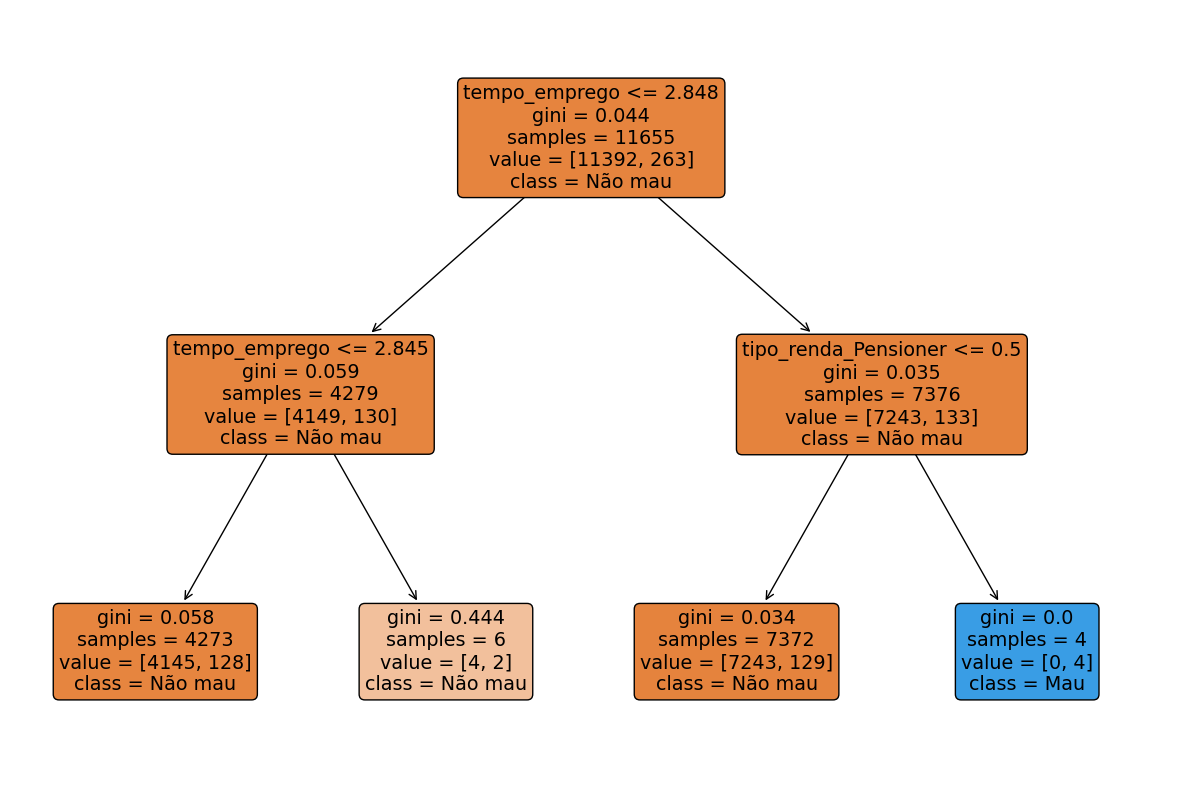

In [33]:
# 3)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=["Não mau", "Mau"], rounded=True)
plt.show()


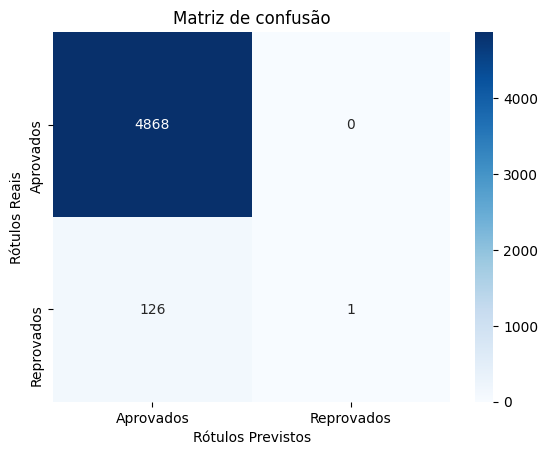

In [34]:
# 4)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Use o modelo treinado para fazer previsões nos dados de teste
y_pred = clf.predict(X_test)

# Crie a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Crie uma representação gráfica de matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Aprovados', 'Reprovados'], yticklabels=['Aprovados', 'Reprovados'])
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Reais')
plt.title('Matriz de confusão')
plt.show()

In [35]:
# 5)
from sklearn.metrics import accuracy_score

# Use o modelo treinado para fazer previsões nos dados de treinamento
y_train_pred = clf.predict(X_train)

# Calcule a acurácia
accuracy = accuracy_score(y_train, y_train_pred)

print(f'Acurácia na base de treinamento: {accuracy:.2f}')

Acurácia na base de treinamento: 0.98


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [37]:
# 1)
# Classifique a base de teste
y_pred = clf.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

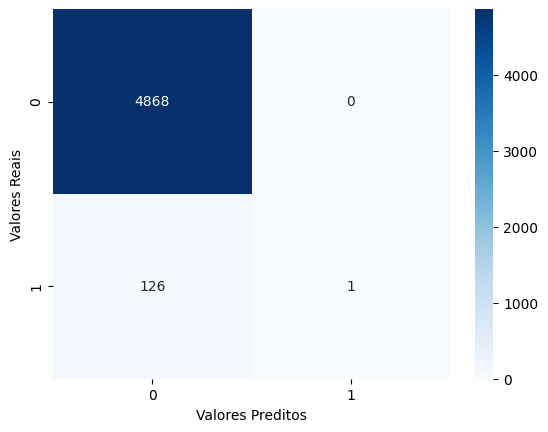

In [38]:
# 2)
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

In [39]:
# 3)
# Use o modelo treinado para fazer previsões nos dados de teste
y_pred_test = clf.predict(X_test)

# Calcule a acurácia na base de teste
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calcule a acurácia na base de treinamento
y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Exiba as acurácias
print(f'Acurácia na base de treinamento: {accuracy_train: .2f}')
print(f'Acurácia na base de teste: {accuracy_test: .2f}')

Acurácia na base de treinamento:  0.98
Acurácia na base de teste:  0.97


In [40]:
# 4)
# Crie um novo classificador com os hiperparametros desejados
clf2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

# Treine o modelo com os dados de treinamento
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [41]:
# Use o modelo treinado para fazer previsões nos dados de teste
y_pred2 = clf2.predict(X_test)

# Crie a matriz de confusão 
conf_matrix2 = confusion_matrix(y_test, y_pred2)

# Calcule a acurácia
accuracy2 = accuracy_score(y_test, y_pred2)

# Imprima a matriz de confusão e a acurácia
print('Matriz de confusão:')
print(conf_matrix2)
print(f'Acurácia: {accuracy2:.2f}')

Matriz de confusão:
[[4848   20]
 [ 116   11]]
Acurácia: 0.97


In [44]:
# Para observar a proporção de proponentes classificados como 'maus', você pode calcular a porcentagem de observações na classe 'mau' na base de teste:
mau_proportion = y_test.sum() / len(y_test)
print(f'Proporção de proponentes "maus" na base de teste: {mau_proportion: .2f}')

Proporção de proponentes "maus" na base de teste:  0.03


# 5)

Se você classificar todos os contratos como 'bons', a acurácia será determinada pelo número de contratos 'bons' corretamente classificados. Isso significa que a acurácia será igual à proporção de contratos 'bons' na base de dados. Em outras palavras, a acurácia será o percentual de contratos 'bons' na base de dados.